<center><font size = "10"> Week 4 - Cable Theory <center>
<center><font size = "8">Home work<center>

<font size = "3">Please, write your group number and the names and surnames of the group members here
<br>Group number:
<br>Group member1:
<br>Group member2:
<br>Group member3:
    
__IMPORTANT:__<font size = "3"> Exercises in <font color='red'>red</font> are mandatory assignements to be delivered by next Monday before 23:59.

# Optional: Voltage variation in space

<font size="3">Create a simple morphology with only one section called soma, as it is done in tutorial 01 of this week 4, point 1. Perform a current clamp experiment in which the stimulation has the following parameters: delay 1 ms, amplitude 1 pA and duration 10 ms. Then do the following:
    

    - inject current at the center and at the end of the soma
    - increase and decrease the number of segments per section
    - manipulate the parameters of the soma (resistance Ra and diameter) and interpret the results


# <font color= 'red'>Ex 1:</font> Action Potential Back Propagation. 

<font size='3'> Create a neuron with a soma, an axon with two sections and a dendrite with three branches, each of the branches with different diameters but with the same length. Add passive properties to every section and add active properties (hh) to the soma axon and to the dendrite, but not to the branches. You can use the parameters from tutorial 03. 

<font size='3'> Perform a current clamp experiment in which the soma is stimulated at the center and the dendritic branches and axon are recorded at their ends. Choose the best stimulation parameters to see the signal attenuation in the branches, visualize and interpret the results.
    
<font size='3'>Explain with your own words:
    
<font size='3'>- What are passive and active membrane properties?
    
<font size='3'>- What is going on with the voltage signal propagation from the soma to each of the branches? 
    
<font size='3'>- What happens if the active properties of the dendrite are removed? <font color= 'red'> [1.5 pts]

In [2]:
# Imports
%matplotlib inline

from neuron import h
import matplotlib.pyplot as plt
import numpy as np
import math as m
import neurom as nm
from neurom import view
from hoc2swc import neuron2swc

--No graphics will be displayed.


In [3]:
# Global containers for objects
simulations_records = []  # stimulations
voltage_records = []  # voltage recordings
current_records = []  # current recordings


def reset():
    """Convenience functions for setting up stimulation, recording and simulation"""
    del simulations_records[:]
    del voltage_records[:]
    del current_records[:]


def iclamp(location, delay=100, amplitude=0.1, duration=500):
    """"Inject a current step with parameters at location"""
    stim = h.IClamp(location)  # Place a stimulation electrode at location
    stim.delay = delay  # stim delay (ms)
    stim.amp = amplitude  # stim amplitude (pA)
    stim.dur = duration  # stim duration (ms)
    simulations_records.append({"stim": stim, "loc": str(location)})


def record_voltage(location):
    """Setup recording of voltage at location"""
    vec = h.Vector()
    vec.record(location._ref_v)  # record voltage at location
    voltage_records.append({"vec": vec, "loc": str(location)})


def record_current(stimulation_dict):
    """Setup recording of stimulation current"""
    vec = h.Vector()
    vec.record(stimulation_dict["stim"]._ref_i)  # record stimulation current
    current_records.append({"vec": vec, "loc": stimulation_dict["loc"]})


def init_run(v_i, t_stop):
    """Initialize and run a simulation"""
    # Record time
    rec_t = h.Vector()
    rec_t.record(h._ref_t)
    # Record current for all stimuli
    for stimulation_dict in simulations_records:
        record_current(stimulation_dict)
    # Setup simulation and run
    h.load_file("stdrun.hoc")
    h.finitialize(v_i)  # initial voltage
    h.continuerun(t_stop)  # final time
    return rec_t


def tvi_plots(t, voltage_records=[], current_records=[], vmax=40, imax=0.5):
    """Plot current and voltage for all stims and recordings"""
    plt.figure()
    plt.title("currents")
    plt.ylim((-0.01, imax))
    plt.xlabel("t (ms)")
    plt.ylabel("I (pA)")
    for idict in current_records:
        plt.plot(t, idict["vec"], label=idict["loc"])
    plt.legend(loc=1)

    plt.figure()
    plt.title("voltages")
    plt.ylim((-71, vmax))
    plt.ylabel("V (mV)")
    plt.xlabel("t (ms)")
    for vdict in voltage_records:
        plt.plot(t, vdict["vec"], label=vdict["loc"])
    plt.legend(loc=1)


def plot_morphology(fname="cell_01"):
    fname = "{}.swc".format(fname)
    h.define_shape()
    h.topology()
    neuron2swc(fname, swap_yz=False)
    neuron1 = nm.load_morphology(fname)
    view.plot_morph(neuron1)


|-|       soma(0-1)
   `--|       dend(0-1)
       `|       branch_0(0-1)
       `|       branch_1(0-1)
       `|       branch_2(0-1)
 `--|       axon(0-1)

Wrote cell 0 to cell_ex01.swc


cell_ex01.swc:9:warning



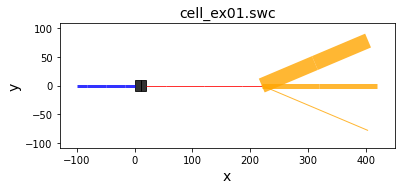

In [4]:
# SOMA
soma = h.Section(name='soma')
soma.L = 20       # length (µm)
soma.diam = 20    # diameter (µm)
soma.Ra = 123.0   # axial resistivity (Ω*cm)
soma.cm = 1       # capacitance (µF/cm^2) 

# Axon section - (blue in plot)
axon = h.Section(name='axon')
axon.diam = 3
axon.L = 100      # length (µm)
axon.nseg = 3     # diameter (µm)
axon.Ra = 123.0   # axial resistivity (Ω*cm)
axon.cm = 1       # capacitance (µF/cm^2) 

# DENDRITE - (red in plot)  
dend = h.Section(name='dend')
dend.L = 200       # length (µm)
dend.diam = 1     # diameter (µm)
dend.nseg = 3    # number of segments
dend.Ra = 123.0   # axial resistivity (Ω*cm)
dend.cm = 1       # capacitance (µF/cm^2) 

# Topology
axon.connect(soma(0))
dend.connect(soma(1))

# Passive properties
soma.insert('pas')
for seg in soma:
    seg.pas.g = 0.0003 # Conductance of the leak channels (in S/cm2)
    seg.pas.e = -70    # Leak reversal potential, it influences the steady state membrane potential

axon.insert('pas')
for seg in axon:
    seg.pas.g = 0.0003 # Conductance of the leak channels (in S/cm2)
    seg.pas.e = -70    # Leak reversal potential, it influences the steady state membrane potential

dend.insert('pas')
for seg in dend:
    seg.pas.g = 0.0003 # Conductance of the leak channels (in S/cm2)
    seg.pas.e = -70    # Leak reversal potential, it influences the steady state membrane potential$

# Active properties    
soma.insert('hh')
for seg in soma:
    seg.hh.gkbar = 0.1   # Maximal conductance of the potassium channels
    seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels

axon.insert('hh')
for seg in axon:
    seg.hh.gkbar = 0.1   # Maximal conductance of the potassium channels
    seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels

dend.insert('hh')
for seg in dend:
    seg.hh.gkbar = 0.1   # Maximal conductance of the potassium channels
    seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels

# DENDRITIC BRANCHES
branch_0 = h.Section(name='branch_0')
branch_1 = h.Section(name='branch_1')
branch_2 = h.Section(name='branch_2')

# Branch geometry
# thick
branch_0.L = 200
branch_0.diam = 15
# middle
branch_1.L = 200
branch_1.diam = 5
# thin
branch_2.L = 200
branch_2.diam = 1

# Connect them
branch_0.connect(dend(1))
branch_1.connect(dend(1))
branch_2.connect(dend(1))

# Passive properties in dendrite branches
branches = [branch_0, branch_1, branch_2]

for branch in branches:
    branch.Ra = 130.0   # axial resistivity (Ω*cm)
    branch.cm = 1       # capacitance (µF/cm^2) 
    branch.insert('pas')
    for seg in branch:
        seg.pas.g = 0.0003 # Conductance of the leak channels (in S/cm2)
        seg.pas.e = -70    # Leak reversal potential, it influences the steady state membrane potential

plot_morphology("cell_ex01")        

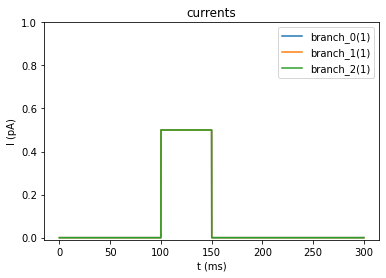

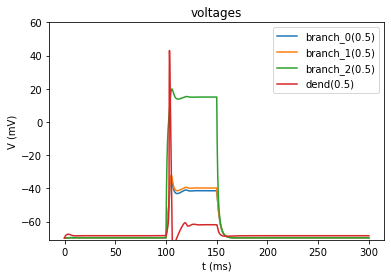

In [5]:
reset()

# Setup stimulations and recordings - dendritic branches and axon apex
for branch in branches:
    iclamp(branch(1), amplitude=0.5, delay=100, duration=50)
    record_voltage(branch(0.5))
record_voltage(dend(0.5))

# Simulate and plot
v_init = -70
t_stop = 300
tvi_plots(init_run(v_init, t_stop), voltage_records, current_records, vmax=60, imax=1)

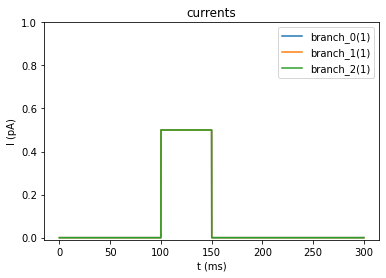

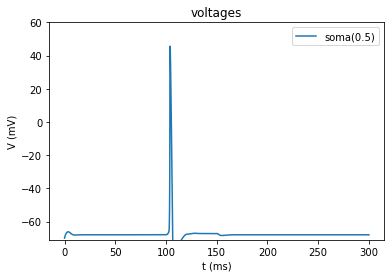

In [6]:
reset()

# Setup stimulations and recordings - soma
for branch in branches:
    iclamp(branch(1), amplitude=0.5, delay=100, duration=50)
record_voltage(soma(0.5))

# Simulate and plot
v_init = -70
t_stop = 300
tvi_plots(init_run(v_init, t_stop), voltage_records, current_records, vmax=60, imax=1)

#### Excitation near the soma

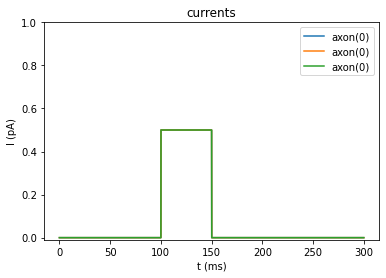

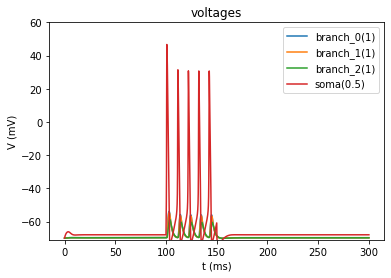

In [7]:
reset()

# Setup stimulations and recordings - soma
for branch in branches:
    iclamp(axon(0), amplitude=0.5, delay=100, duration=50)
    record_voltage(branch(1))
record_voltage(soma(0.5))

# Simulate and plot
v_init = -70
t_stop = 300
tvi_plots(init_run(v_init, t_stop), voltage_records, current_records, vmax=60, imax=1)

#### Active properties of dendrites removed


|-|       soma(0-1)
   `--|       dend(0-1)
       `|       branch_0(0-1)
       `|       branch_1(0-1)
       `|       branch_2(0-1)
 `--|       axon(0-1)

Wrote cell 0 to cell_ex01b.swc


cell_ex01b.swc:9:warning



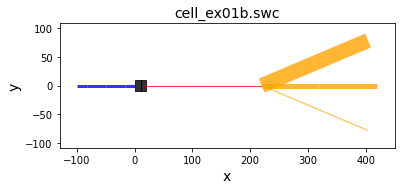

In [8]:
# SOMA
soma = h.Section(name='soma')
soma.L = 20       # length (µm)
soma.diam = 20    # diameter (µm)
soma.Ra = 123.0   # axial resistivity (Ω*cm)
soma.cm = 1       # capacitance (µF/cm^2) 

# Axon section - (blue in plot)
axon = h.Section(name='axon')
axon.diam = 3
axon.L = 100      # length (µm)
axon.nseg = 3     # diameter (µm)
axon.Ra = 123.0   # axial resistivity (Ω*cm)
axon.cm = 1       # capacitance (µF/cm^2) 

# DENDRITE - (red in plot)  
dend = h.Section(name='dend')
dend.L = 200       # length (µm)
dend.diam = 1     # diameter (µm)
dend.nseg = 3    # number of segments
dend.Ra = 123.0   # axial resistivity (Ω*cm)
dend.cm = 1       # capacitance (µF/cm^2) 

# Topology
axon.connect(soma(0))
dend.connect(soma(1))

# Passive properties
soma.insert('pas')
for seg in soma:
    seg.pas.g = 0.0003 # Conductance of the leak channels (in S/cm2)
    seg.pas.e = -70    # Leak reversal potential, it influences the steady state membrane potential

axon.insert('pas')
for seg in axon:
    seg.pas.g = 0.0003 # Conductance of the leak channels (in S/cm2)
    seg.pas.e = -70    # Leak reversal potential, it influences the steady state membrane potential

dend.insert('pas')
for seg in dend:
    seg.pas.g = 0.0003 # Conductance of the leak channels (in S/cm2)
    seg.pas.e = -70    # Leak reversal potential, it influences the steady state membrane potential$

# Active properties    
soma.insert('hh')
for seg in soma:
    seg.hh.gkbar = 0.1   # Maximal conductance of the potassium channels
    seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels

axon.insert('hh')
for seg in axon:
    seg.hh.gkbar = 0.1   # Maximal conductance of the potassium channels
    seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels

# DENDRITIC BRANCHES
branch_0 = h.Section(name='branch_0')
branch_1 = h.Section(name='branch_1')
branch_2 = h.Section(name='branch_2')

# Branch geometry
# thick
branch_0.L = 200
branch_0.diam = 15
# middle
branch_1.L = 200
branch_1.diam = 5
# thin
branch_2.L = 200
branch_2.diam = 1

# Connect them
branch_0.connect(dend(1))
branch_1.connect(dend(1))
branch_2.connect(dend(1))

# Passive properties in dendrite branches
branches = [branch_0, branch_1, branch_2]

for branch in branches:
    branch.Ra = 130.0   # axial resistivity (Ω*cm)
    branch.cm = 1       # capacitance (µF/cm^2) 
    branch.insert('pas')
    for seg in branch:
        seg.pas.g = 0.0003 # Conductance of the leak channels (in S/cm2)
        seg.pas.e = -70    # Leak reversal potential, it influences the steady state membrane potential
        
plot_morphology("cell_ex01b")

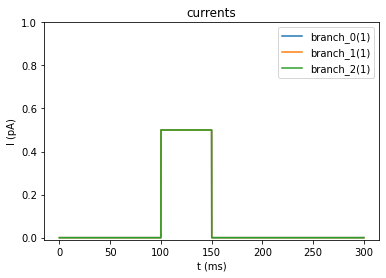

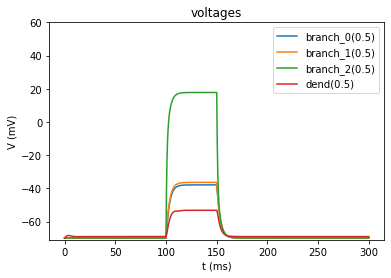

In [9]:
reset()

# Setup stimulations and recordings - dendrites and axon
for branch in branches:
    iclamp(branch(1), amplitude=0.5, delay=100, duration=50)
    record_voltage(branch(0.5))
record_voltage(dend(0.5))

# Simulate and plot
v_init = -70
t_stop = 300
tvi_plots(init_run(v_init, t_stop), voltage_records, current_records, vmax=60, imax=1)

#### Discussion
    
- **What are passive and active membrane properties?**

Passive membrane properties denote the flow of electrons independent of voltage-gated ion channels, that is the leaky current. On the other hand, active membrane properties relates to these voltage gated ion channels, mostly due to Potassium and Sodium ions. These properties are directly connected to Action Potential triggering.
    
- **What is going on with the voltage signal propagation from the soma to each of the branches?** 

Multiple action potential are fired when the excitation is close to the soma. Also, one can observe that the action potential amplitude decrease with distance from the soma. Therefore, the amplitude at the apex of the dendrites is close to baseling. Yet, we can still see the soma activity in dendrites. 
    
- **What happens if the active properties of the dendrite are removed?**

One can observe the reduced amplitude of the signal when active properties of dendrites are removed. The action potential is not triggered, because there is only the leaky current implied. Hence the lower proportion of voltage gated ion channels opened. Hence, the cell fires for a shorter period of time. 

# <font color= 'red'>Ex 2:</font> Dendritic input signal sumation in the soma

<font size="3">Load the morphology file for your group, and instantiate it as it is done in tutorial 03. Perform a current clamp experiment that stimulates all the dendrites (basal and apical) at their midpoints. Play around with the different stimulation parameters: delay, amplitude and duration.

<font size="3">Plot results of different stimulation protocols that help you explain: 
    
    - What is dendritic signal integration? And, in your opinion, what is the importance of this in biology? 
    - What happens if you stimulate only apical dendrites? What is the cause of this effect?
    
<font size="3"> __Hint:__ use the information on the articles that you can find in the home work folder in the moodle for this week 4. <font color= 'red'> [2.5 pts]

# <font color= 'red'>Ex 3:</font> Signal attenuation: dendrites vs axon

<font size="3">Load the morphology file for your group, and instantiate it as it is done in tutorial 03. Perform a current clamp experiment in which the soma is stimulated in the middle (find the stimulation parameters that support your explanation better). Record the back propagating signals of the dendrites and the forward signal in the axon.

<!-- <font size="3"> -->
    - What would you expect in terms of attenuation? 
    - Would you expect the signal to be more attenuated in the axon or in the dendrites and why? 
    - Which neurite properties does attenuation depend on?
    
    
<font color= 'red'>[2 pts]
    

In [1]:
%matplotlib inline

from neuron import h
import matplotlib.pyplot as plt
import numpy as np
import math as m
import neurom as nm
from neurom import view
from hoc2swc import neuron2swc

In [10]:
class NEURON:
    def __init__(self,active = True):
        self.build_morphology()
        self.define_biophysics(active)

    def build_morphology(self):
        """
        Loads a 3D morphology of the neuron
        """
        # Load hoc routines to import 3D morphologies
        h.load_file("stdlib.hoc")
        h.load_file("import3d.hoc")
        # cell = h.Import3d_SWC_read() # We have a .swc morphology file
        cell = h.Import3d_Neurolucida3()

        # Read the file and creates automatically section.connect(parent) statements
        cell.input("Group5_morphology.asc")

        # Instantiate morphology for simulation and
        # execute the connect statements and loads the cell into h scope
        self.importedcell = h.Import3d_GUI(cell, 0)
        self.importedcell.instantiate(None)

        # Create python lists from the morphology with the different sections: soma, dend, apic and axon
        self.somatic = []
        self.dendritic = []
        self.apical = []
        self.axonal = []
        self.all = []
        for sec in h.allsec():
            if "soma" in sec.name():
                self.somatic.append(sec)
            if "dend" in sec.name():
                self.dendritic.append(sec)
            if "apic" in sec.name():
                self.apical.append(sec)
            if "axon" in sec.name():
                self.axonal.append(sec)

    def define_biophysics(self,active):
        """
        Distributes passive mechanisms and hh active prop on the soma and dendrites
        """
        # Define passive properties for all sections
        for sec in h.allsec():
            sec.insert("pas")
            sec.nseg = 1
            for seg in sec:
                seg.pas.g = 0.0003  # Conductance of the leak channels (in S/cm2)
                seg.pas.e = -70

        # Define active properties for soma, dendrite, apical dendrite and axon
        for sec in self.somatic:
            # insert hh
            sec.insert("hh")
            sec.Ra = 1
            sec.nseg = 1
            for seg in sec:
                seg.hh.gkbar = 0.1  # Maximal conductance of the potassium channels
                seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels

        for sec in self.dendritic:
            sec.Ra = 300
            sec.nseg = 1
            if active:
                # insert hh
                sec.insert("hh")
                for seg in sec:
                    seg.hh.gkbar = 0.1  # Maximal conductance of the potassium channels
                    seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels

        for sec in self.apical:
            sec.Ra = 400
            sec.nseg = 1
            if active:
                # insert hh
                sec.insert("hh")
                for seg in sec:
                    seg.hh.gkbar = 0.1  # Maximal conductance of the potassium channels
                    seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels

        for sec in self.axonal:
            sec.Ra = 100
            sec.nseg = 1
            if active:
                # insert hh
                sec.insert("hh")
                for seg in sec:
                    seg.hh.gkbar = 0.1  # Maximal conductance of the potassium channels
                    seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels


In [11]:
Cell = NEURON();


14982 lines read


In [12]:
# Global containers for objects
simulations_records = []  # stimulations
voltage_records = []  # voltage recordings
current_records = []  # current recordings


def reset():
    """Convenience functions for setting up stimulation, recording and simulation"""
    del simulations_records[:]
    del voltage_records[:]
    del current_records[:]


def iclamp(location, delay=100, amplitude=0.1, duration=500):
    """"Inject a current step with parameters at location"""
    stim = h.IClamp(location)  # Place a stimulation electrode at location
    stim.delay = delay  # stim delay (ms)
    stim.amp = amplitude  # stim amplitude (pA)
    stim.dur = duration  # stim ducurrent_recordsration (ms)
    simulations_records.append({"stim": stim, "loc": str(location)})


def record_voltage(location):
    """Setup recording of voltage at location"""
    vec = h.Vector()
    vec.record(location._ref_v)  # record voltage at location
    voltage_records.append({"vec": vec, "loc": str(location)})


def record_current(stimulation_dict):
    """Setup recording of stimulation current"""
    vec = h.Vector()
    vec.record(stimulation_dict["stim"]._ref_i)  # record stimulation current
    current_records.append({"vec": vec, "loc": stimulation_dict["loc"]})


def init_run(v_i, t_stop):
    """Initialize and run a simulation"""
    # Record time
    rec_t = h.Vector()
    rec_t.record(h._ref_t)
    # Record current for all stimuli
    for stimulation_dict in simulations_records:
        record_current(stimulation_dict)
    # Setup simulation and run
    h.load_file("stdrun.hoc")
    h.finitialize(v_i)  # initial voltage
    h.continuerun(t_stop)  # final time
    return rec_t


def tvi_plots(
    t, voltage_records=[], current_records=[], vmax=40, imax=0.5, legendv=True
):
    """Plot current and voltage for all stims and recordings"""
    plt.figure(figsize=(16,9))
    plt.title("currents")
    plt.ylim((-0.01, imax))
    plt.xlabel("t (ms)")
    plt.ylabel("I (pA)")
    for idict in current_records:
        plt.plot(t, idict["vec"], label=idict["loc"])
    if legendv:
        plt.legend(loc=1)

    plt.figure(figsize=(16,9))
    plt.title("voltages")
    plt.ylim((-81, vmax))
    plt.xlim((50,150))
    plt.ylabel("V (mV)")
    plt.xlabel("t (ms)")
    for vdict in voltage_records:
        plt.plot(t, vdict["vec"], label=vdict["loc"])
    plt.legend(loc=1)


def plot_morphology(fname="cell_01"):
    fname = "{}.swc".format(fname)
    h.define_shape()
    h.topology()
    neuron2swc(fname, swap_yz=False)
    neuron1 = nm.load_morphology(fname)
    view.plot_morph(neuron1)


|-|       soma[0](0-1)
  `|       axon[0](0-1)
    `|       axon[1](0-1)
      `|       axon[2](0-1)
        `|       axon[3](0-1)
          `|       axon[4](0-1)
          `|       axon[5](0-1)
            `|       axon[6](0-1)
              `|       axon[7](0-1)
              `|       axon[8](0-1)
                `|       axon[9](0-1)
                `|       axon[10](0-1)
            `|       axon[11](0-1)
              `|       axon[12](0-1)
                `|       axon[13](0-1)
                  `|       axon[14](0-1)
                    `|       axon[15](0-1)
                      `|       axon[16](0-1)
                      `|       axon[17](0-1)
                        `|       axon[18](0-1)
                        `|       axon[19](0-1)
                    `|       axon[20](0-1)
                  `|       axon[21](0-1)
                `|       axon[22](0-1)
              `|       axon[23](0-1)
        `|       axon[24](0-1)
          `|       axon[25](0-1)
            `|    

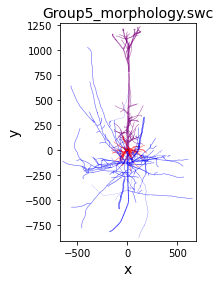

In [5]:
plot_morphology("Group5_morphology")

Current Clamp experiment in the soma:

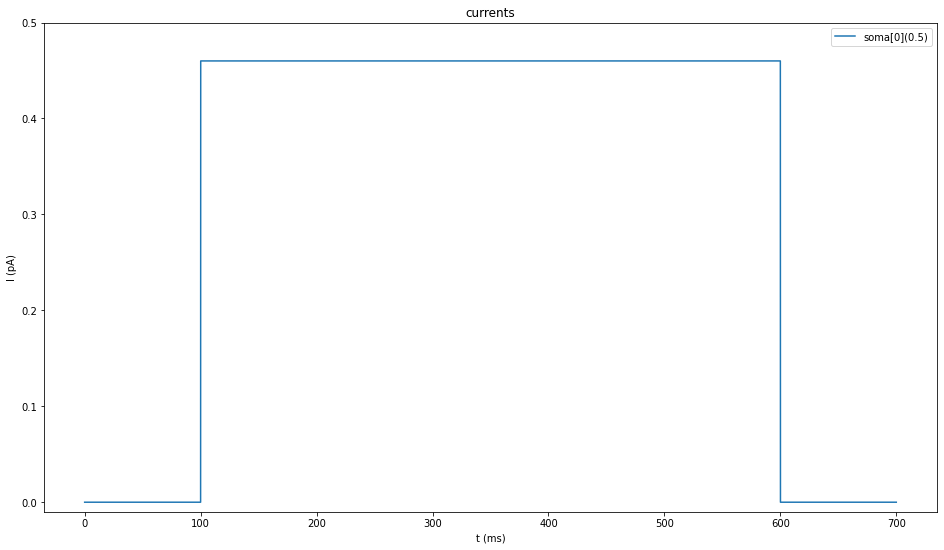

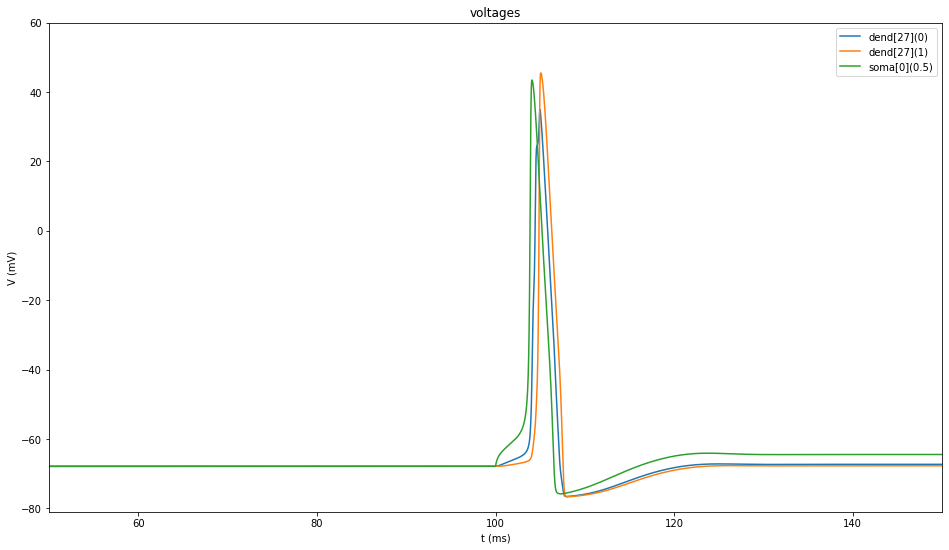

In [6]:
reset()

# Scan at different locations with different delays
locations = np.linspace(0, 1, 2)

# Setup stimulations and recordings
I_Clamp_Amplitude = 0.46
iclamp(Cell.somatic[0](0.5), amplitude=I_Clamp_Amplitude)

#Record Voltage Response in apical Dendrites, Dendrites and Axon

#record_voltage(Cell.apical[83](p))
   
record_voltage(Cell.dendritic[27](0.))
record_voltage(Cell.dendritic[27](1))
    
#record_voltage(Cell.axonal[169](0))
#record_voltage(Cell.axonal[169](1))
    
record_voltage(Cell.somatic[0](0.5))

# Simulate and plot
v_init = -70
t_stop = 700
tvi_plots(init_run(v_init, t_stop), voltage_records, current_records, vmax=60)

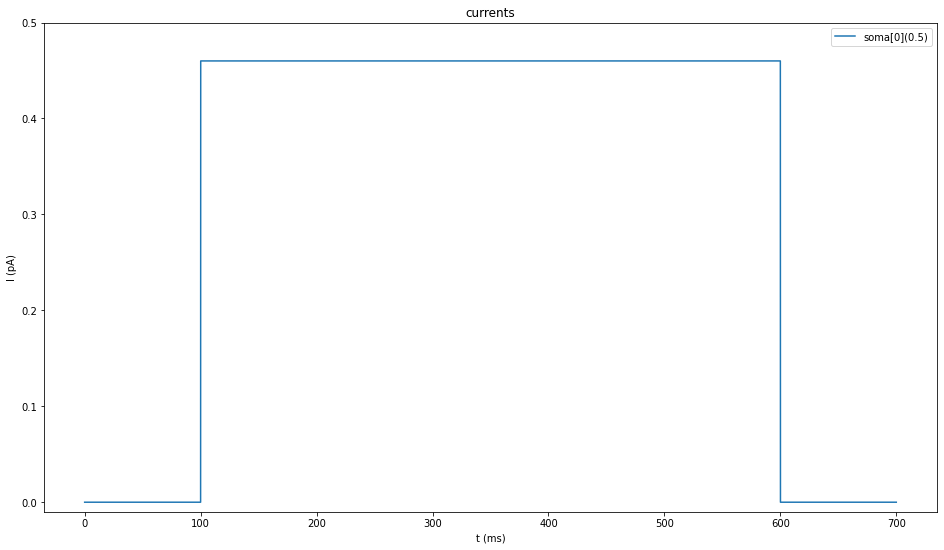

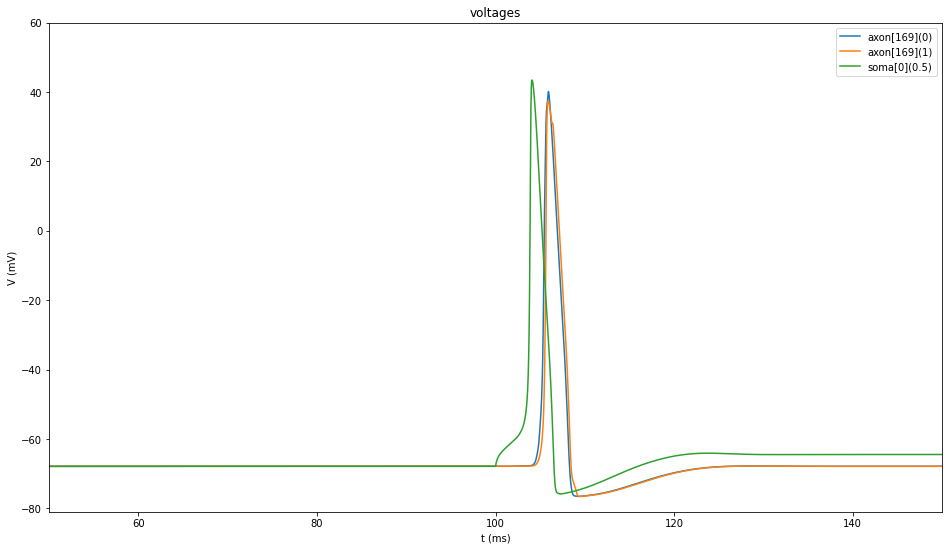

In [7]:
reset()

# Scan at different locations with different delays
locations = np.linspace(0, 1, 2)

# Setup stimulations and recordings
I_Clamp_Amplitude = 0.46
iclamp(Cell.somatic[0](0.5), amplitude=I_Clamp_Amplitude)

#Record Voltage Response in apical Dendrites, Dendrites and Axon

#record_voltage(Cell.apical[83](p))
   
#record_voltage(Cell.dendritic[27](0))
#record_voltage(Cell.dendritic[27](1))
    
record_voltage(Cell.axonal[169](0))
record_voltage(Cell.axonal[169](1))
    
record_voltage(Cell.somatic[0](0.5))

# Simulate and plot
v_init = -70
t_stop = 700
tvi_plots(init_run(v_init, t_stop), voltage_records, current_records, vmax=60)

<font size="3"> We observe atenuation of the signal in the both axons and dendrites (see plot of dend[27](0) and axon[169]). However, amplification at the ends of dendrites (see dend[27](1) plot) due to backpropagation cannot be ignored. Hence attenuation is more pronounced in the axon than in the dendrites. Attenuation depends on the active properties of membranes (ion channel conductances). This can be shown by removing all active properties from axons and dendrites and repeating the experiment (see the plots below). 

In [14]:
Cell = NEURON(active = False)


14982 lines read


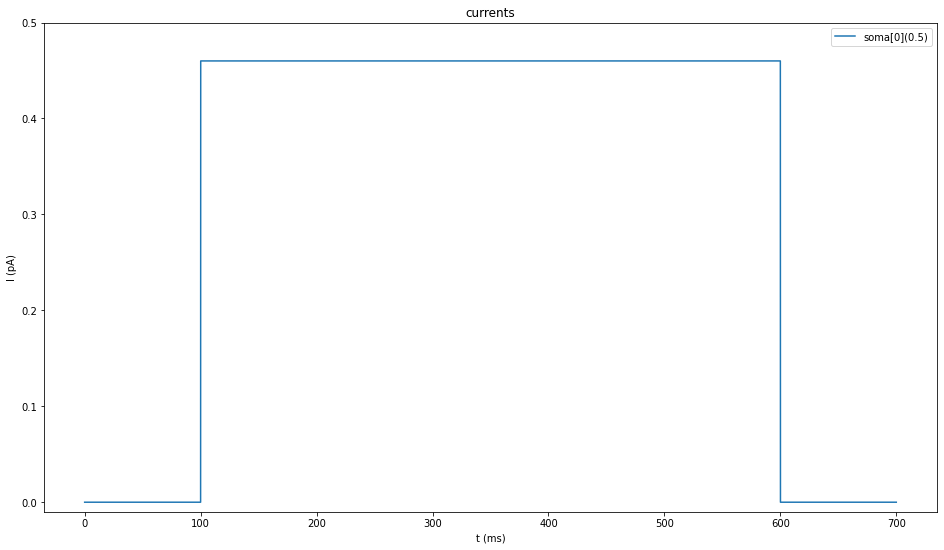

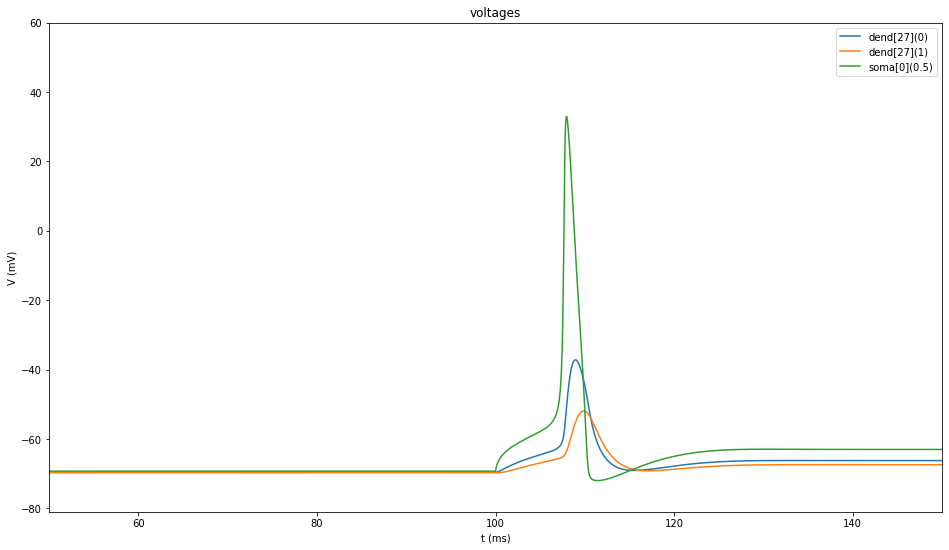

In [15]:
reset()

# Scan at different locations with different delays
locations = np.linspace(0, 1, 2)

# Setup stimulations and recordings
I_Clamp_Amplitude = 0.46
iclamp(Cell.somatic[0](0.5), amplitude=I_Clamp_Amplitude)

#Record Voltage Response in apical Dendrites, Dendrites and Axon

#record_voltage(Cell.apical[83](p))
   
record_voltage(Cell.dendritic[27](0.))
record_voltage(Cell.dendritic[27](1))
    
#record_voltage(Cell.axonal[169](0))
#record_voltage(Cell.axonal[169](1))
    
record_voltage(Cell.somatic[0](0.5))

# Simulate and plot
v_init = -70
t_stop = 700
tvi_plots(init_run(v_init, t_stop), voltage_records, current_records, vmax=60)

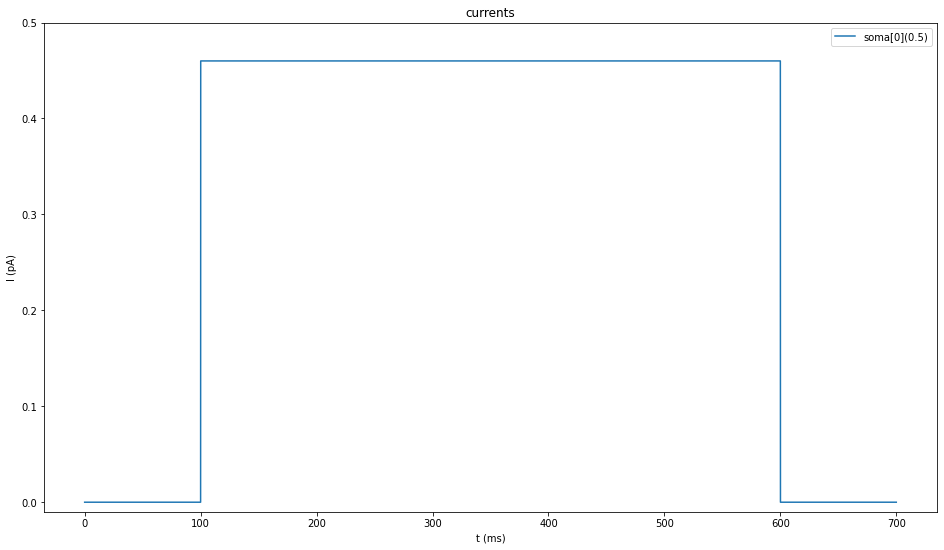

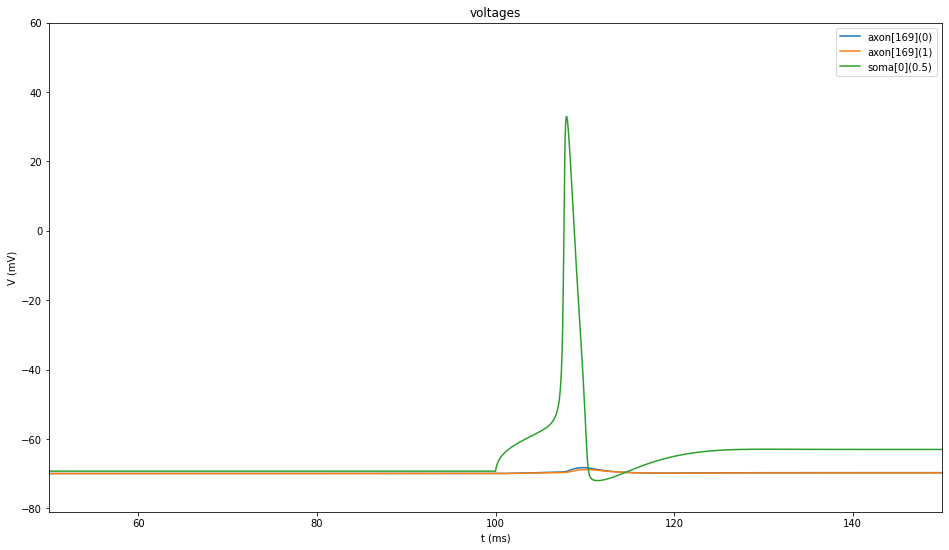

In [16]:
reset()

# Scan at different locations with different delays
locations = np.linspace(0, 1, 2)

# Setup stimulations and recordings
I_Clamp_Amplitude = 0.46
iclamp(Cell.somatic[0](0.5), amplitude=I_Clamp_Amplitude)

#Record Voltage Response in apical Dendrites, Dendrites and Axon

#record_voltage(Cell.apical[83](p))
   
#record_voltage(Cell.dendritic[27](0))
#record_voltage(Cell.dendritic[27](1))
    
record_voltage(Cell.axonal[169](0))
record_voltage(Cell.axonal[169](1))
    
record_voltage(Cell.somatic[0](0.5))

# Simulate and plot
v_init = -70
t_stop = 700
tvi_plots(init_run(v_init, t_stop), voltage_records, current_records, vmax=60)